In [1]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt # plotting library for 
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import requests
from PIL import Image
from io import BytesIO
import cv2  # image processing library
import pandas as pd
import numpy as np  # linear algebra
import os # used for loading the data

In [ ]:
#script to call data from API vs loading from drive.

! mkdir .kaggle
! mv .kaggle /root/.kaggle
file = open ('/root/.kaggle/kaggle.json', 'w')
file.write('{"username":"vndyyy","key":"de89249ca3e940a9e3aa7eeff9dbe44c"}')
file.close()
! kaggle datasets download -d alessiocorrado99/animals10

  5% 29.0M/586M [00:02<00:44, 13.2MB/s]
User cancelled operation


In [2]:
!unzip /content/drive/MyDrive/animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [3]:
fpath = "/content/raw-img/"
translate = {"cane": "Dog", "cavallo": "Horse", "elefante": "Elephant", "farfalla": "Butterfly", "gallina": "Chicken", "gatto": "Cat", "mucca": "Cow", "pecora": "Sheep", "scoiattolo": "Squirrel", "ragno": "Spider"}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Image Data Generator

In [5]:
#Creating Dataframe of images' path
foldernames = os.listdir(fpath)
files, files2, target, target2 = [], [], [], []

for i, folder in enumerate(foldernames):
    filenames = os.listdir(fpath+ folder);
    count = 0
    for file in filenames:
        # elephant has 1446 imges only. To maintain uniformty of counts among different classes, choose only first 1400 images
        if count < 20000:
            files.append(fpath + folder + "/" + file)
            target.append(translate[folder])
        else:
            files2.append(fpath + folder + "/" + file)
            target2.append(translate[folder])
        count += 1

df = pd.DataFrame({'Filepath':files, 'Target':target})
dft = pd.DataFrame({'Filepath':files2, 'Target':target2})
train, other = train_test_split(df, test_size=0.2, random_state = 0)
valid, test = train_test_split(other, test_size=.5, random_state =0)

In [6]:
image_shape = (224,224,3)

#Create Randonmess

In [7]:
#Randomness created for training set
datagen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              rotation_range=30, 
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              samplewise_center = True)

In [8]:
datagen_test = ImageDataGenerator(rescale=1./255, samplewise_center = True)

In [9]:
#Training data
train_gen = datagen.flow_from_dataframe(train, 
                                        x_col = 'Filepath', 
                                        y_col = 'Target',
                                         target_size=image_shape[:2], 
                                        interpolation = 'lanczos', 
                                        validate_filenames = False)

Found 20943 non-validated image filenames belonging to 10 classes.


In [10]:
#Testing data
test_gen = datagen_test.flow_from_dataframe(test, 
                                             x_col = 'Filepath', 
                                             y_col = 'Target', 
                                             target_size=image_shape[:2], 
                                             interpolation = 'lanczos', 
                                             validate_filenames = False)

Found 2618 non-validated image filenames belonging to 10 classes.


In [1]:
#validation data
val_gen = datagen_test.flow_from_dataframe(valid, 
                                             x_col = 'Filepath', 
                                             y_col = 'Target', 
                                             target_size=image_shape[:2],
                                             interpolation = 'lanczos', 
                                             validate_filenames = False)

NameError: ignored



#Building Model





In [13]:
model = tf.keras.Sequential()

#1st Layer
model.add(tf.keras.layers.Conv2D(filters=64, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding="SAME"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='SAME'))

#2nd Layer
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), strides=(1,1), padding="SAME"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='SAME'))

#3rd Layer
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="SAME"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='SAME'))

#4th Layer
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="SAME"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='SAME'))

#5th Layer
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="SAME"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='SAME'))

#6th Layer
model.add(tf.keras.layers.Conv2D(filters=512,  kernel_size=(3,3), strides=(1,1), padding="SAME"))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='SAME'))



#Flatten
model.add(tf.keras.layers.Flatten())

#One dense layer with Dropout.
model.add(tf.keras.layers.Dense(256, input_shape=(224,224,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))

#output layer
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer= Adam(lr=0.001), 
              metrics=['accuracy'])



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     8320      
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 128)   

In [21]:
#model training, to 15 epochs due to processing units running out
history = model.fit(train_gen, batch_size=64, epochs = 15, validation_data = val_gen)


Epoch 1/5
655/655 [==============================] - 316s 483ms/step - loss: 0.7279 - accuracy: 0.7607 - val_loss: 0.7604 - val_accuracy: 0.7418
Epoch 2/5
655/655 [==============================] - 314s 480ms/step - loss: 0.6890 - accuracy: 0.7705 - val_loss: 0.8066 - val_accuracy: 0.7437
Epoch 3/5
655/655 [==============================] - 318s 486ms/step - loss: 0.6822 - accuracy: 0.7765 - val_loss: 0.8243 - val_accuracy: 0.7292
Epoch 4/5
655/655 [==============================] - 318s 486ms/step - loss: 0.6594 - accuracy: 0.7807 - val_loss: 0.7461 - val_accuracy: 0.7636
Epoch 5/5
655/655 [==============================] - 319s 486ms/step - loss: 0.6264 - accuracy: 0.7900 - val_loss: 0.7052 - val_accuracy: 0.7689


#Plotting the Training Accuracy

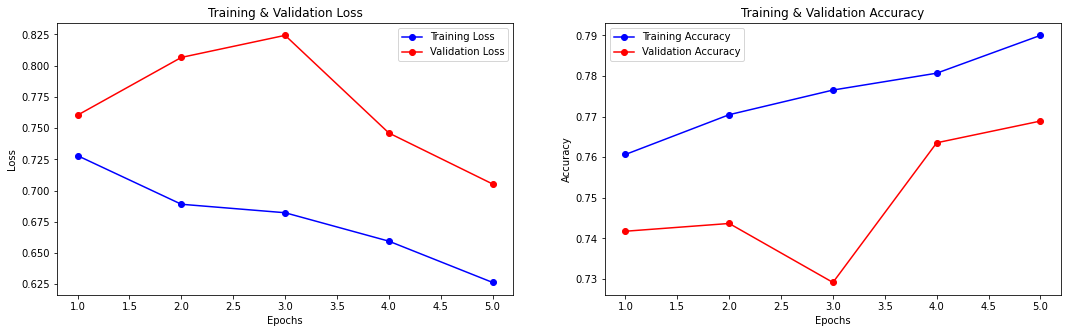

In [22]:
loss_vals = history.history['loss']
val_loss_vals = history.history['val_loss']
epochs = range(1, len(history.history['accuracy'])+1)

f, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,5))
    
ax[0].plot(epochs, loss_vals,  marker='o', color = 'blue', label='Training Loss')
ax[0].plot(epochs, val_loss_vals, marker='o', color = 'red', label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best')

acc_vals = history.history['accuracy']
val_acc_vals = history.history['val_accuracy']

ax[1].plot(epochs, acc_vals, marker='o', color = 'blue', label='Training Accuracy')
ax[1].plot(epochs, val_acc_vals, marker='o', color = 'red', label='Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best')

plt.show()

In [ ]:
acc_vals = history.history['accuracy']
val_acc_vals = history.history['val_accuracy']
print(acc_vals)

[0.36346274614334106, 0.48259562253952026, 0.5288640856742859, 0.5613331198692322, 0.5795731544494629, 0.6047844290733337, 0.6211144328117371, 0.6314281821250916, 0.6449410319328308, 0.6546817421913147, 0.666905403137207, 0.6776488423347473, 0.684476912021637, 0.6945041418075562, 0.6988015174865723]


#Evaluation


In [17]:
score = model.evaluate(test_gen)

82/82 [==============================] - 16s 193ms/step - loss: 0.7679 - accuracy: 0.7536


#Prediction Setup

using images from google image search

In [18]:
#Images were found on google, mostly. First horse image is from an anime, but stil classified correctly.
#there was no close pictures to test missclassfications, failed to include that in this round.
img_url = ['https://image.myanimelist.net/ui/pS5NP3aGIBuYLQdLYlDDPuEgLOdL-UGiFbvvZ55-ft61ieX4k9ohUoxtzrdRuORuQaJTrvtmHBfgBXBD79Zixw',
           'https://cdn.shopify.com/s/files/1/0012/7831/2522/files/Screen_Shot_2021-08-19_at_6.22.19_AM_1024x1024.png?v=1629379376',
           'https://www.elephantnaturepark.org/wp-content/uploads/2020/04/94351084_2570825139826450_7563146999747313664_n.jpg',
           'https://agrilifetoday.tamu.edu/wp-content/uploads/2022/06/MicrosoftTeams-image-5-1.jpg',
           'https://cdn.mos.cms.futurecdn.net/BX7vjSt8KMtcBHyisvcSPK.jpg',
           'https://static01.nyt.com/images/2021/09/14/science/07CAT-STRIPES/07CAT-STRIPES-mediumSquareAt3X-v2.jpg',
           'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Cow_female_black_white.jpg/1280px-Cow_female_black_white.jpg',
           'https://cdn.cnn.com/cnnnext/dam/assets/200829155222-worlds-most-expensive-sheep-super-tease.jpg',
           'https://www.popsci.com/uploads/2021/08/05/pexels-skyler-ewing-7830065-scaled.jpg',
           'https://www.sciencenewsforstudents.org/wp-content/uploads/2021/09/1440_spider_feet_feat-1030x580.jpg',
          ]

In [19]:
img_get = []
!mkdir Downloaded_Images
for i in range(len(img_url)):
    Image.open(BytesIO(requests.get(img_url[i]).content)).save("/content/image" + str(i) + '.png')
    
# Load Images to array
new_images = []
for i in range(len(img_url)):
    temp = np.array(tf.keras.preprocessing.image.load_img( "/content/image" + str(i) + '.png', color_mode = "rgb", target_size = (224, 224), interpolation="lanczos")) / 255.0
    new_images.append(temp)
new_images = np.array(new_images)

In [20]:
# Store predictions in out
modelPrediction = model.predict(new_images)
pred_model = modelPrediction.argmax(axis = -1)
out_model = []
for x in pred_model:
    labels = train_gen.class_indices
    for label, val in labels.items():
        if val == x:
            out_model.append(label)

1/1 [==============================] - 1s 504ms/step


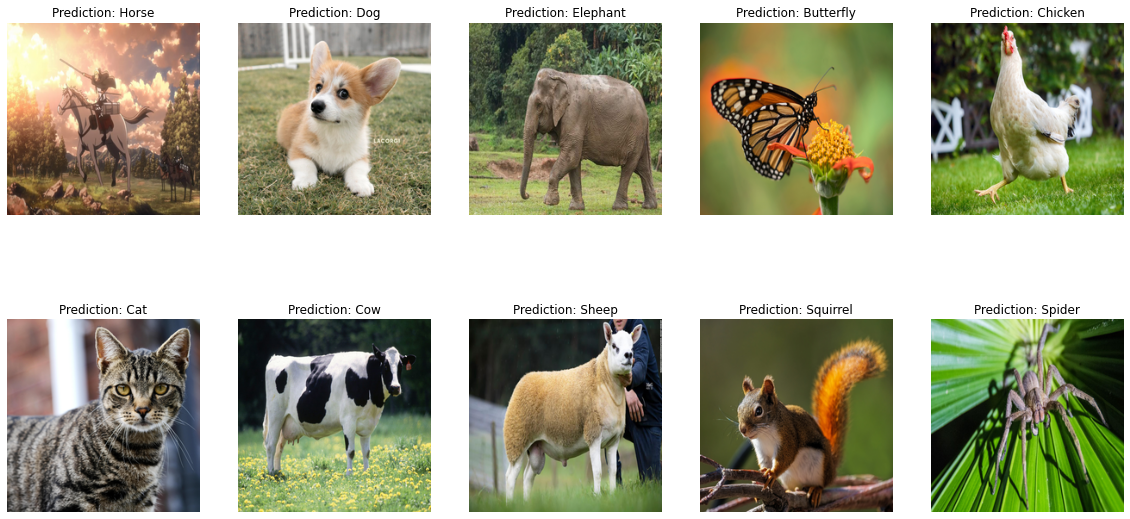

In [ ]:
rows,cols = ((len(new_images) - 1) // 5 ) + 1,5
temp_axis = rows * 5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,temp_axis))
for i in range(len(new_images)):
    predict = 'Prediction: ' + out_resnet[i]
    axes[i//cols, i%cols].set_title(predict)
    axes[i//cols, i%cols].axis('off')
    axes[i//cols, i%cols].imshow(new_images[i])